# 4 - Path in Causal Diagram


---
**Outline**

1. Review
2. Session 1: Causal Path and Back Door
   - Finding All Path in Causal Diagram
   - Job Training on Earnings
   - Gender Wage Gap Causal Path
   - Programming on Social Skills
3. Session 2: Front Door Path
   - Effect of Winning the Lottery on Bankruptcy

---
## Causal Path and Back Door

- Causal path is any sequence of variables connecting treatment and outcome on the diagram. Causal path provide explanations for why variables are related. By considering different paths, We can identify additional factors that might influence the relationship between the treatment and outcome variables.
- How to analyze causal effects using the paths? We have discussed some ways related to controlling variables in the path. We can formalize the process by using a metaphor as a fundamental framework by categorizing path
  - Front Door Path: Paths where all the arrows point away from the treatment and towards the outcome
  - Back Door Path: Back door paths have at least one arrow pointing back at the treatment. They represent alternative explanation for variable relationships.
- Identification of causality: closing bad paths/back doors and leaving open good paths/front doors.
- Purpose of Examining Paths on Diagram
  - Help us distinguish between different reasons for variable relationships
  - Categorize them based on their relevance to our research question.
  - Later, we can decide whether we use back door controlling or single out front door to answer the causal question based on the problem we face
- We can identify causal relationships by following steps:
  - Model the data generating process using causal diagram
  - List all paths
  - Determining back doors or alternate explanations for why a relationship might occur.
  - Closing down back door paths e.g by controlling variables
- Controlling for variables along back door paths helps in identify causality.
---
## Front Door Path

- Challenges with Back Door Paths
  - Difficulties to control variables (e.g. controlling health)
  - Hard to measure control variable and even if we can measure, those variables are still hard to be validly extracted. (e.g. Attitude towards risk, Curiosity, Intellectual ability)
- When we find difficulties in estimating causal relationships by focusing on back door, Front door paths offer an alternative approach to causal identification.Instead of closing down all back door paths, we can focus on isolating front door paths.
- How to isolating the front door?
  - Finding settings in which the variation that is not affected by back doors and focusing analysis only in that part. (Randomized Controlled Experiment)
  - Selecting Settings with Limited Back Door Paths (Natural Experiment)
  - Estimating Individual Arrows on the Front Door Paths (Front Door Method)


In [1]:
# It may took a few minutes
!sudo apt-get update
!sudo apt-get install graphviz -y
!pip install causalgraphicalmodels

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,267 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,764 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,840 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,148 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security

In [8]:
!pip install causalgraphicalmodels graphviz

!sed -i 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python3.*/dist-packages/causalgraphicalmodels/cgm.py


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel

# Finding All Path in Causal Diagram
---

### Causal Diagram

- Given causal diagram representing data generating process of how X affect Y
- We will demonstrate how to list all path and categorizing the path

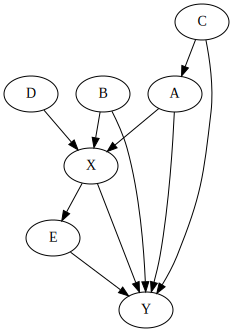

In [10]:
# Causal diagram
example_diagram = CausalGraphicalModel(nodes=["X", "Y", "A", "B", "C", "D", "E"],
                                       edges=[("A", "X"),
                                              ("A", "Y"),
                                              ("B", "X"),
                                              ("B", "Y"),
                                              ("C", "A"),
                                              ("C", "Y"),
                                              ("D", "X"),
                                              ("E", "Y"),
                                              ("X", "E"),
                                              ("X", "Y")])

# Draw return a graphviz object
example_diagram.draw()

### List All Paths

- Remember start from X (treatment) to Y (outcome)
- Do not include cycle

- X &rarr; Y
- X &rarr; E &rarr; Y
- X &larr; A &rarr; Y
- X &larr; A &larr; C &rarr; Y
- X &larr; B &rarr; Y

### Categorize Paths

Front Door
- X &rarr; Y
- X &rarr; E &rarr; Y

Back Door
- X &larr; A &rarr; Y
- X &larr; A &larr; C &rarr; Y
- X &larr; B &rarr; Y

#Lalonde Study: Job Training on Earnings in 1978
---
    
- LaLonde (1986) study was assessing the impact of a job training program on earnings in 1978
- It has data where the individuals **randomly assigned** to a job training program (saved in `jtrain2`). So this is essentially **experimental data**
- And another data (saved in `jtrain3`) that contains **observational data**, where individuals themselves largely determine whether they participate in job training.

In `jtrain2`, since the job training progam is randomly assigned, it was a randomized experiment, and therefore we know the average treatment effect of job training on earning. The goal of causal inference is how we do adjustments in observational data, `jtrain3`, in order to obtain accurate similar results, in experimtental data `jtrain2`

### Causal Diagram

- What potential challenges or biases could arise in the analysis of `jtrain3`?
- Individuals who are in need of training may have a higher likelihood of receiving lower wages regardless of their participation in the program.
- We may have another unobeserved variable that may affect both training and wage

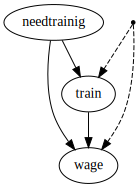

In [12]:
# Create causal diagram
lalonde_diagram = CausalGraphicalModel(nodes=["train", "wage", "needtrainig"],
                                       edges=[("train", "wage"),
                                              ("needtrainig", "train"),
                                              ("needtrainig", "wage")],
                                      latent_edges = [("train", "wage")])

# Draw return a graphviz object
lalonde_diagram.draw()

In this diagram, we have to backdoor paths
- train &larr; needtraining &rarr; wage
- train &larr; U1 &rarr; wage

U1: unobserved variable.

It means we can control need training program variable and those unobserved variable to estimate the effect of training on wage

### Load Data

In [13]:
# Randomized Experiment Data
jtrain2 = pd.read_stata('JTRAIN2.DTA')
jtrain2.head()

,train,age,educ,black,hisp,married,nodegree,mosinex,re74,re75,re78,unem74,unem75,unem78,lre74,lre75,lre78,agesq,mostrn
0,1,37,11,1,0,1,1,13,0.0,0.0,9.93005,1,1,0,0.0,0.0,2.295566,1369,13
1,1,22,9,0,1,0,1,13,0.0,0.0,3.59589,1,1,0,0.0,0.0,1.279792,484,13
2,1,30,12,1,0,0,0,13,0.0,0.0,24.90950,1,1,0,0.0,0.0,3.215249,900,13
3,1,27,11,1,0,0,1,13,0.0,0.0,7.50615,1,1,0,0.0,0.0,2.015723,729,13
4,1,33,8,1,0,0,1,13,0.0,0.0,0.28979,1,1,0,0.0,0.0,-1.238599,1089,13


In [14]:
# Randomized Experiment Data

jtrain2_grouped = jtrain2.groupby('train').agg({'re78': 'mean'})
jtrain2_grouped

,re78
train,
0,4.554802
1,6.349145


In [16]:
# Randomized Experiment Data

jtrain3 = pd.read_stata('jtrain3.dta')

jtrain3.head()

,train,age,educ,black,hisp,married,re74,re75,unem75,unem74,re78,agesq,trre74,trre75,trun74,trun75,avgre,travgre,unem78,em78
0,1,37,11,1,0,1,0.0,0.0,1,1,9.93005,1369,0.0,0.0,1,1,0.0,0.0,0,1
1,1,30,12,1,0,0,0.0,0.0,1,1,24.90950,900,0.0,0.0,1,1,0.0,0.0,0,1
2,1,27,11,1,0,0,0.0,0.0,1,1,7.50615,729,0.0,0.0,1,1,0.0,0.0,0,1
3,1,33,8,1,0,0,0.0,0.0,1,1,0.28979,1089,0.0,0.0,1,1,0.0,0.0,0,1
4,1,22,9,1,0,0,0.0,0.0,1,1,4.05649,484,0.0,0.0,1,1,0.0,0.0,0,1


In [17]:
# Observational Data

jtrain3_grouped = jtrain3.groupby('train').agg({'re78': 'mean'})
jtrain3_grouped

,re78
train,
0,21.553923
1,6.349145


In [18]:
# Randomized Experiment Data

jtrain2[["re75","re78"]].describe()

,re75,re78
count,445.000000,445.000000
mean,1.377139,5.300766
std,3.150960,6.631485
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.701810
75%,1.220840,8.124720
max,25.142200,60.307899


In [19]:
# Observational Data

jtrain3[["re75","re78"]].describe()

,re75,re78
count,2675.000000,2675.000000
mean,17.850893,20.502377
std,13.877760,15.632547
min,0.000000,0.000000
25%,7.605290,9.243400
50%,17.008101,19.432100
75%,25.583700,28.815699
max,156.653000,121.174004


- If we look their average earning in 1975, it's not apple to apple comparison
- `jtrain2` have 1.3 average earnning in 1975, meanwhile`jtrain3` have 17.8 average earning in 1975
- The two datasets focus on entirely distinct groups of individuals since the average earning in observational data are more higher that experimental data
- It will be more fair comparison if we compare those who have similar caracteristic in our back door, e.g. only need training

While it is not possible to directly measure the concept of "needing training," we can indirectly address it by restricting our analysis to individuals who exhibited low wages in 1975, as they are more likely to be in need of training.

In [20]:
# Randomized Experiment Data

jtrain2_grouped = jtrain2.groupby('train').agg({'re78': 'mean'})
jtrain2_grouped

,re78
train,
0,4.554802
1,6.349145


In [21]:
# Observational Data

filtered_data = jtrain3["re75"]<1.2
jtrain3_grouped = jtrain3[filtered_data].groupby('train').agg({'re78': 'mean'})
jtrain3_grouped

,re78
train,
0,5.622178
1,5.995010


#### Controlling
- We have two methods to control variable in back door, (1) Matching, picking samples that have different values of treatment but have values of controlled variables that are as similar as possible and (2) Regression, use controlled variable as predictor
- Here, we obtain quite similar result after picking only those who have low earning in 1975 from observational data `jtrain3`, assuming those will have similar characteristic in needing training (our control variable) of participant in `jtrain2`
- Although not perfectly identical (which is not unexpected, considering the arbitrary method for controlling the concept of need training), this approach represents an improvement.

#### Other Variables That We Don't Controlled
- However, it is important to note that we still have not addressed, or controlling unobserved variable that explain relationship between train and wage, and we have left out plenty of other back doors: race, age, etc.


Another alternative is to control directly for 1975 wages, which serves as a demonstration of controlling through a different method, regression.

In [22]:
# Fit linear regression models
model1 = sm.ols('re78 ~ train', data = jtrain3)
model1_res = model1.fit()

# Show the summary of model
print(model1_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     173.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.03e-38
Time:                        22:37:28   Log-Likelihood:                -11066.
No. Observations:                2675   AIC:                         2.214e+04
Df Residuals:                    2673   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5539      0.304     70.985      0.0

In [23]:
# Fit linear regression models
model2 = sm.ols('re78 ~ train + re75', data = jtrain3)
model2_res = model2.fit()

# Show the summary of model
print(model2_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     1652.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:37:30   Log-Likelihood:                -10073.
No. Observations:                2675   AIC:                         2.015e+04
Df Residuals:                    2672   BIC:                         2.017e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6531      0.360     15.684      0.0

#  Colliders in Gender Wage Gap Causal Path
---
    

- We don't need to control for everything to ensure the most accurate apple-to-apple comparison. We must be aware not to control variable in front door and collider variable
- A collider is a variable on a specific path where both arrows point towards it. Treatment ←  A → **B** ←  C → Outcome. If a collider exists on a pathway, it is pre-closed, meaning it already shuts down the variation needed for that pathway. If we control for the collider variable B, that path becomes open again.

Sometimes, situation can become quite complex. In certain instances, to block one backdoor path, it becomes necessary to control for the same variable, which, in turn, acts as a collider on another backdoor path.
- Here's an example to show that condition

### Causal Diagram

Here's the diagram related to show the effect of gender in wage

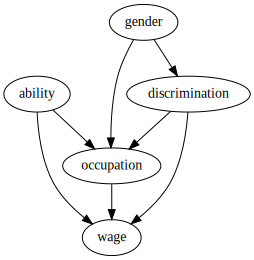

In [24]:
# Create causal diagram
gendergap_diagram = CausalGraphicalModel(nodes=["discrimination", "wage", "gender", "occupation", "ability"],
                                       edges=[("discrimination", "wage"),
                                              ("gender", "discrimination"),
                                              ("gender", "occupation"),
                                              ("occupation", "wage"),
                                              ("discrimination", "occupation"),
                                              ("ability", "wage"),
                                              ("ability", "occupation")])

# Draw return a graphviz object
gendergap_diagram.draw()

# Programming on Social Skills: Collider Bias
---  
- You are interested in investigating whether programming skills have an impact on social skills.
- To explore this, you conduct a study at a tech company where you test all employees on both programming and social skills.
- Let’s imagine that the *truth* programming skills and social skills are unrelated, you unexpectedly discover a negative relationship between the two.
- This outcome raises the question of what could be causing this apparent contradiction.

### Causal Diagram

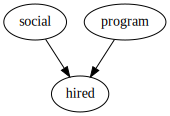

In [25]:
# Create causal diagram
programmingskills_diagram = CausalGraphicalModel(nodes=["program", "hired", "social"],
                                       edges=[("program", "hired"),
                                              ("social", "hired")])

# Draw return a graphviz object
programmingskills_diagram.draw()

Our path here is **program &larr; hired &rarr; social**
- Oops, By exclusively surveying employees at the tech company, you inadvertently introduced a control variable known as "works  in a tech company." or `hired` in this diagram
- This control variable is influenced by both programming skills and social skills. In other words, it acts as a **collider** in the relationship between programming skills and social skills, potentially leading to misleading conclusions.

### Simulating Data

In [26]:
# Generate program and social skill came from normal distribution

np.random.seed(14233)
survey = pd.DataFrame({
    'prog': np.random.randn(1000),
    'social': np.random.randn(1000)
})

# Hired come from both programming and social skill, say that if both skill are higher than 0.25, they will be hired
survey['hired'] = (survey['prog'] + survey['social'] > 0.25)

survey

,prog,social,hired
0,-0.227659,-1.213904,False
1,-0.972326,0.584242,False
2,0.655571,1.425162,True
3,-0.473091,0.004468,False
4,-0.887861,-0.305886,False
...,...,...,...
995,0.713888,1.276131,True
996,0.313258,0.076984,True
997,0.338012,1.046436,True
998,0.156127,-0.350381,False


In [27]:
survey.corr()

,prog,social,hired
prog,1.000000,-0.022868,0.555093
social,-0.022868,1.000000,0.552066
hired,0.555093,0.552066,1.000000


### Controlling Collider

In [28]:
# Surveying everyone and controlling hired variable

model = sm.ols('social ~ prog + hired', data=survey).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 social   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     427.3
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          9.68e-135
Time:                        22:37:46   Log-Likelihood:                -1108.2
No. Observations:                1000   AIC:                             2222.
Df Residuals:                     997   BIC:                             2237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6520      0.034    -18.989

### Visualization

<Axes: xlabel='social', ylabel='prog'>

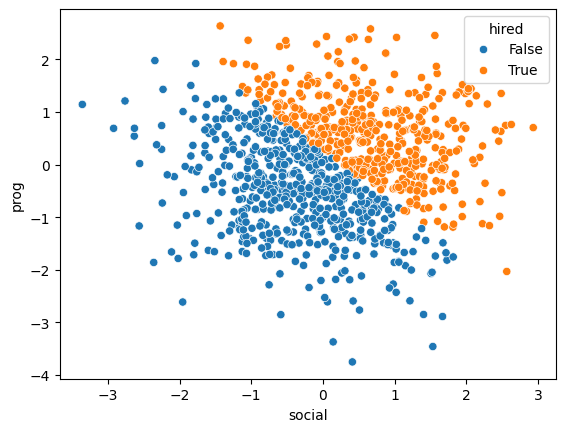

In [29]:
sns.scatterplot(x = "social", y= "prog", data = survey, hue= "hired")

<Axes: xlabel='residual_social', ylabel='prog'>

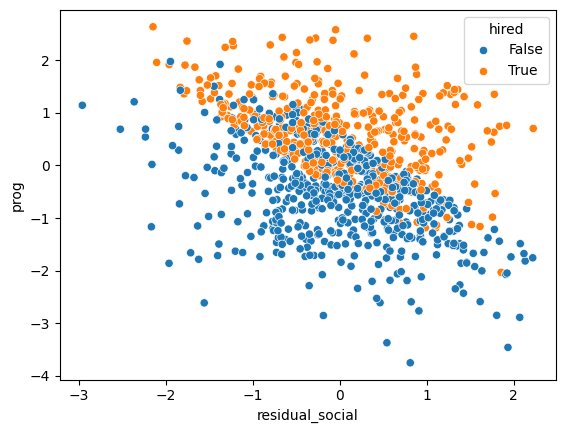

In [30]:
# Fit linear regression models
model = sm.ols('social ~ hired', data=survey)
model_sum = model.fit()

# Take the residual
survey["residual_social"] = model_sum.resid

sns.scatterplot(x = "residual_social", y= "prog", data = survey, hue= "hired")

<Axes: xlabel='residual_program', ylabel='residual_social'>

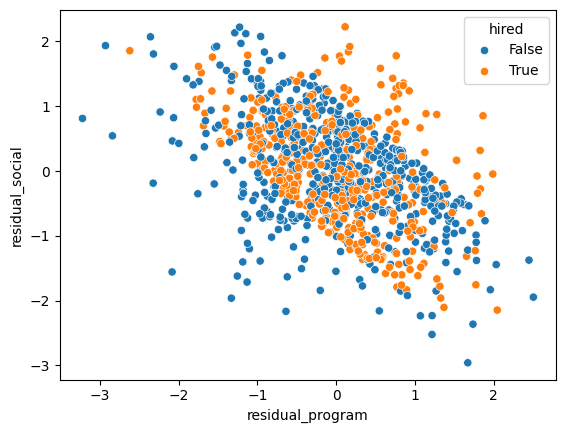

In [31]:
# Fit linear regression models
model = sm.ols('prog ~ hired', data = survey)
model_sum = model.fit()

# Take the residual
survey["residual_program"] = model_sum.resid

sns.scatterplot(x = "residual_program", y= "residual_social", data = survey, hue= "hired")

### Conclusion

Although we found that they have negative relationship after controlling hired, we controlling collider, so the conclusion will be biased if we control the hired

If we don't take into account whether a person actually hired or not, your programming skills and your social skills are independent, the path is closed.
- In simpler terms, knowing how skilled you are in programming doesn't provide any information about your ability in social skills, and vice versa.

If a person is hired, the situation changes. Here the hired is controlled
- Suddenly, your programming skill becomes indicative of social skills.
- If you are not good in programming but still managed to get hired, it is likely that you excel at social skills.
- On the other hand, if you lack the social skill, it must mean that you are good in programming skills.


# Effect of Winning the Lottery on Bankruptcy
---

- This study conducted by Scott Hankins, Mark Hoekstra, and Paige Skiba in 2011¹
- It focuses on the impact of winning the lottery on declaring bankruptcy later.
- Specifically examines the Florida lottery and includes only individuals who have won some amount of money.

### Analysis

- Analysis includes individuals who have won money in the lottery, excluding non-lottery players.
- This approach controls for variables associated with being the type of person who plays the lottery.

In [32]:
lottery = pd.read_csv('lottery_data.csv')
lottery.head()

,Years from Winning,Probability of Bankruptcy,group
0,-5.0,0.001186,"Large Amount\n($50-$150,000)"
1,-4.0,0.000052,"Large Amount\n($50-$150,000)"
2,-3.0,-0.003918,"Large Amount\n($50-$150,000)"
3,-2.0,0.001804,"Large Amount\n($50-$150,000)"
4,-1.0,0.002423,"Large Amount\n($50-$150,000)"


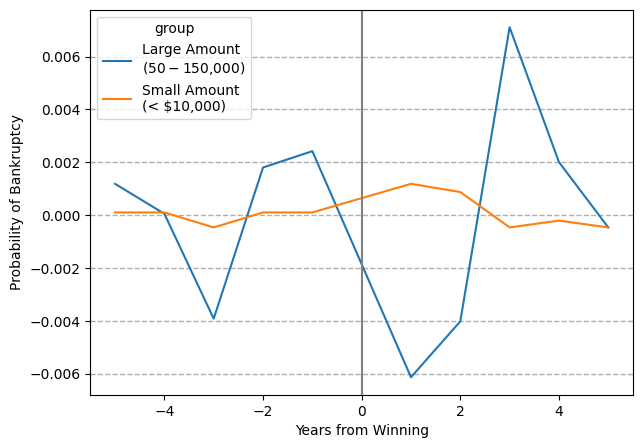

In [33]:
plt.figure(figsize=(7, 5))

sns.lineplot(data = lottery, x = 'Years from Winning', y = 'Probability of Bankruptcy', hue = "group")

plt.axvline(x=0, color='gray')

plt.grid(True, axis='y', linestyle='--', linewidth=1)
plt.show()


### Validity of Results

- The study relies on the assumption that winning the lottery is random.- Researchers conducted various checks to ensure randomness, such as examining the relationship between winning and observed characteristics (e.g., winner's location), but found no correlation.
- However, they identified one potential confounding factor: Changes in the Florida lottery's rules over time, affecting the number of small-prize winners. To address this, the year in which the prize was awarded is controlled for in the analysis.
- Non-lottery players were excluded from the research. The fact that someone CAN choose to join lottery or not may tell something about their characteristics - i.e. those who did not participate in lottery may have lower income, more risk averse, etc.
- Then, it is important to say that we cannot easily generalize the results to the whole population.


### Conclusion

- The study's results are deemed robust in terms of design.
- It is acknowledged that the fluctuation in bankruptcy rates for big-prize winners before winning might be due to limited sample size and noise.
- Overall, the findings indicate that winning a significant lottery prize does not significantly reduce the long-term chances of bankruptcy among lottery players in Florida.


### Reference
- Wooldridge source dataset: https://www.cengage.com/cgi-wadsworth/course_products_wp.pl?fid=M20b&product_isbn_issn=9781111531041
- The Effect Chapter 8-9 by Nick Huntington-Klein.
- Causal Inference: The Mixtape Chapter 5 by Scott Cunningham